# This Is Jeopardy!

This is a project provided by [Codecademy](http://codecademy.com) in the Data Science track. 

Below, you will find the following:

- Basic exercises for the Pandas library in Python, i.e., mainly data frame manipulation and simple data exploration.
- Custom functions for finding trends in a data set and visualizing them.
- A simple text-based game in which you can play a modified version of Jeopardy! yourself, using the questions and answers in the database.

![Jeopardy Image](1599px-Jeopardy!_game_board_US.svg.png "Jeopardy Image")

Image Credit: [Wikipedia Creative Commons](https://commons.wikimedia.org/wiki/File:Jeopardy!_game_board_US.svg)

## Project Goals

You will work to write several functions that investigate a dataset of Jeopardy! questions and answers. Filter the dataset for topics that you’re interested in, compute the average difficulty of those questions, and train to become the next Jeopardy champion!

### Exercise 1

We’ve provided a csv file containing data about the game show Jeopardy! in a file named `jeopardy.csv`. Load the data into a DataFrame and investigate its contents. Try to print out specific columns.

Note that in order to make this project as “real-world” as possible, we haven’t modified the data at all — we’re giving it to you exactly how we found it. As a result, this data isn’t as “clean” as the datasets you normally find on Codecademy. More specifically, there’s something odd about the column names. After you figure out the problem with the column names, you may want to rename them to make your life easier the rest of the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

df = pd.read_csv("jeopardy.csv")
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams


In [111]:
# Fixing whitespace in column names

df = df.rename(columns=lambda x: x.strip())

# Some data exploration

print(f"This data frame has {len(df)} rows.\n")
print(f"The rounds in this data set are: {df.Round.unique()}.\n")
print(f"The categories in this data set are: {df.Category.unique()}.\n")

# Convert Value column to number for further calculations. 
    # Added string conversion in first step to avoid an AttributeError.
df["Value"] = df.Value.apply(lambda row: np.nan if row == "None" 
                             else float(str(row).replace(",", "").replace("$", "")))

print(f"The mean value of a question is ${df.Value.mean().round(2)}.\n")

# Altering data frame to enable analysis of time by extracting the year as an int and adding a decade variable

df["year"] = df["Air Date"].apply(lambda row: int(row[:4]))
df["decade"] = df["year"].apply(lambda row: "1980s" if row < 1990 and row > 1979
                                else ("1990s" if row > 1989 and row < 2000 
                                      else ("2000s" if row > 1999 and row < 2010 
                                            else ("2010s" if row > 2009 and row < 2020 else np.nan))))

print(f"These data range from {df.year.min()} to {df.year.max()}. \n")

This data frame has 216930 rows.

The rounds in this data set are: ['Jeopardy!' 'Double Jeopardy!' 'Final Jeopardy!' 'Tiebreaker'].

The categories in this data set are: ['HISTORY' "ESPN's TOP 10 ALL-TIME ATHLETES" 'EVERYBODY TALKS ABOUT IT...'
 ... 'OFF-BROADWAY' 'RIDDLE ME THIS' 'AUTHORS IN THEIR YOUTH'].

The mean value of a question is $752.6.

These data range from 1984 to 2012. 



### Exercise 2

Write a function that filters the dataset for questions that contains all of the words in a list of words. For example, when the list `["King", "England"]` was passed to our function, the function returned a DataFrame of 152 rows. Every row had the strings `"King"` and `"England"` somewhere in its `" Question"`.

Note that in this example, we found 152 rows by filtering the entire dataset. You can download the entire dataset at the start or end of this project. The dataset used on Codecademy is only a fraction of the dataset so you won’t find as many rows.

Test your function by printing out the column containing the question of each row of the dataset.

In [3]:
# Simple function. Enhanced version can be found below (exercise 3). 

def filter_data(data, words): 
    filter = lambda x: all(word.lower() in x.lower() for word in words)
    return data.loc[data["Question"].apply(filter)]

new_df = filter_data(df, ["King", "England"])
print(len(new_df))

152


### Exercise 3

Test your original function with a few different sets of words to try to find some ways your function breaks. Edit your function so it is more robust.

For example, think about capitalization. We probably want to find questions that contain the word `"King"` or `"king"`.

You may also want to check to make sure you don’t find rows that contain substrings of your given words. For example, our function found a question that didn’t contain the word "king", however it did contain the word `"viking"` — it found the `"king"` inside `"viking"`. Note that this also comes with some drawbacks — you would no longer find questions that contained words like `"England's"`.

In [4]:
# Capitalization was taken care of in original function. 
# Added spaces around words in keyword list passed to function to detect only 'whole' words.
# Another way to break the function is to pass something other than a list; added converstion.
    # This is necessary to use the function in other functions, e.g. in exercise 4.

def enhanced_filter(data, words):
    if type(words) != list:
        words = [str(words)]
    spaced_words = [" " + word + " " for word in words] # limiting hits to standalone target words only
    filter = lambda x: all(word.lower() in x.lower() for word in spaced_words)
    return data.loc[data["Question"].apply(filter)]

### Exercise 4

We may want to eventually compute aggregate statistics, like `.mean()` on the `" Value"` column. But right now, the values in that column are strings. Convert the `" Value"` column to floats. If you’d like to, you can create a new column with the float values.

Now that you can filter the dataset of question, use your new column that contains the float values of each question to find the “difficulty” of certain topics. For example, what is the average value of questions that contain the word `"King"`?

Make sure to use the dataset that contains the float values as the dataset you use in your filtering function.

In [5]:
# Value column was already modified above.

def find_avg_value(data, word):   
    filtered_df = enhanced_filter(data, word)
    return filtered_df.Value.mean()

find_avg_value(df, "King")

821.2250712250712

### Exercise 5

Write a function that returns the count of the unique answers to all of the questions in a dataset. For example, after filtering the entire dataset to only questions containing the word `"King"`, we could then find all of the unique answers to those questions. The answer “Henry VIII” appeared 3 times and was the most common answer.

In [6]:
# If we want to find unique answers in a data set filtered by a certain specified keyword:

def answer_counts_keyword(data, word):
    filtered_data = enhanced_filter(data, word)
    return filtered_data["Answer"].value_counts()

# Plain function (one could still pass a pre-filtered data frame as an argument):

def answer_counts(data):
    return data["Answer"].value_counts()
    
print(answer_counts_keyword(df, "King")) # Pass a data frame and a keyword
print(answer_counts(df)) # Pass just a data frame

Henry VIII                           31
Richard III                          20
Sweden                               18
Norway                               18
Solomon                              17
                                     ..
Bad, Bad Leroy Brown                  1
Elephants                             1
Deborah Kerr                          1
Ruritania                             1
a pyramid (the pyramids accepted)     1
Name: Answer, Length: 1040, dtype: int64
China                             216
Australia                         215
Japan                             196
Chicago                           194
France                            193
                                 ... 
the barre (or bar)                  1
grams                               1
the Hopis                           1
free parking                        1
Grigori Alexandrovich Potemkin      1
Name: Answer, Length: 88268, dtype: int64


### Exercise 6

Explore from here! This is an incredibly rich dataset, and there are so many interesting things to discover. There are a few columns that we haven’t even started looking at yet. Here are some ideas on ways to continue working with this data:

- Investigate the ways in which questions change over time by filtering by the date. How many questions from the 90s use the word "Computer" compared to questions from the 2000s?
- Is there a connection between the round and the category? Are you more likely to find certain categories, like "Literature" in Single Jeopardy or Double Jeopardy?
- Build a system to quiz yourself. Grab random questions, and use the input function to get a response from the user. Check to see if that response was right or wrong. Note that you can’t do this on the Codecademy platform — to do this, download the data, and write and run the code on your own computer!

---

### 1. How do questions change over time?

In [7]:
# Function that takes a keyword and returns a data frame showing how often a question came up, by decade

def change_over_time(data, words):
    filtered = enhanced_filter(data, words)
    grouped = filtered.groupby(["decade"]).count()
    return grouped["Question"].reset_index().rename(columns = {"Question": words})

print(change_over_time(df, "Computer"))

  decade  Computer
0  1980s         4
1  1990s        57
2  2000s       167
3  2010s        43


It looks like the keyword `'computer'` was used most frequently in the 2000s. 

However, we know, for example, that the 1980s and 2010s don't span full decades (since our data ranged from 1984 until 2012). 

Additionally, we don't know whether our dataset contains full data from every decade, or that some decades may be better represented than others. So it is important to check whether the number of questions overall in each decade is roughly equal.

In [8]:
print(df.groupby("decade").Question.count())
print(df.groupby("year").Question.count())

decade
1980s      8108
1990s     56745
2000s    123852
2010s     28225
Name: Question, dtype: int64
year
1984     1179
1985      888
1986     1409
1987     1275
1988     1290
1989     2067
1990     4337
1991     1444
1992     1885
1993     2132
1994     1136
1995     1138
1996     4891
1997    13099
1998    13143
1999    13540
2000    13439
2001    12097
2002     6859
2003     9426
2004    13190
2005    13560
2006    13726
2007    13940
2008    14036
2009    13579
2010    13756
2011    13376
2012     1093
Name: Question, dtype: int64


As we suspected, the 1990s and 2000s contain more questions overall than the other decades. If we look at the data by year, we see that from 1997 onwards there is approximately the same amount of data every year (excluding 2002, 2003 and 2012). This uneven amount of questions per year is likely to bias any trend we observe in the data. 

A solution could be to investigate which *percentage* (or ratio) of the overall questions are about a certain topic; this would correct for the number of questions but yield numbers that are difficult to interpret.

In [9]:
# Option 1: Calculate a ratio of hits to the total number of questions within a decade

def corr_change_over_time(data, words):
    uncor = change_over_time(data, words)
    total_qs = data.groupby(["decade"]).Question.count().reset_index()
    comb = total_qs.merge(uncor, how = "left").reset_index()
    comb["ratio"] = comb.apply(lambda row: row[words] / row["Question"] * 100, axis=1)
    return comb[["decade", "Question", words, "ratio"]].rename(columns = {"Question": "Total Qs", words: "Hits", "ratio": "Corrected Hits"})

corr_change_over_time(df, "computer")

,decade,Total Qs,Hits,Corrected Hits
0,1980s,8108,4,0.049334
1,1990s,56745,57,0.100449
2,2000s,123852,167,0.134838
3,2010s,28225,43,0.152347


From this corrected analysis we can conclude that questions containing the word 'computer" became more common every decade (up to .15% in the 2010s). This also shows why correction was important; raw data suggest a peak in the 2000s, but corrected data reveals that questions containing the keyword `'computer'` were in fact more common in the 2010s.

Another possibility is to create random samples of equal size from each decade and investigate the number of occurences of the keyword in those randomly selected data samples. This is easier to interpret but introduces some (additional) sampling error. Moreover, keywords that exist in the total data set are more likely to be randomly selected in earlier decades (because the sample represents a larger portion of the total available data) than in later decades.

In [10]:
# Option 2: Alter function to take a random sample of rows (n=7500) within each decade
    # Returns a data frame with the corrected and uncorrected number of hits, as well as the total number of questions
    # Since a random sample is taken, output can differ slighly upon repitition, due to sampling error

def sample_change_over_time(data, words):
    sampled = data.groupby(["decade"]).sample(n=4000)
    filtered = enhanced_filter(sampled, words)
    grouped = filtered.groupby(["decade"]).count()
    uncor = change_over_time(data, words)
    cor = grouped["Question"].reset_index()
    total_q = data.groupby(["decade"]).Question.count().reset_index().rename(columns = {"Question": "Total Qs"})
    return uncor.merge(cor, how="left").merge(total_q, how="left").rename(columns = {words: "Uncorrected Hits", "Question": "Corrected Hits"})

print(sample_change_over_time(df, "computer"))

  decade  Uncorrected Hits  Corrected Hits  Total Qs
0  1980s                 4               4      8108
1  1990s                57               2     56745
2  2000s               167               5    123852
3  2010s                43               5     28225


Finally, we can use any of functions to visualize change over time. This function defaults to displaying uncorrected hits, but can be set to use correction (either displaying the ratio of hits or using a random sample of questions) by passing the arguments "ratio" or "sample".

 
        Please provide a valid correction type ('ratio', 'sample' or 'none').         
        If no type is specified, 'ratio' is used by default.
        
        'Ratio' will provide a ratio of the number of times a question contains the keyword, 
        as a percentage of the total number of questions from that decade.
        
        'Sample' will take a random sample (n=4000) within each decade and provide the number of questions 
        containing the keyword.
        
        'None' provides the number of times the keyword was found in a question in the total data set, by decade.
        No correction for the number of questions is used. 
        


<AxesSubplot:xlabel='decade'>

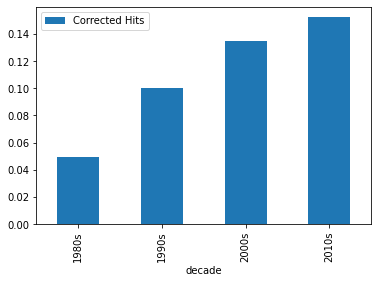

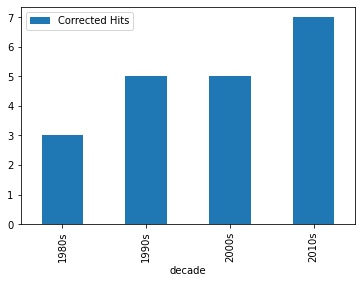

In [11]:
def visualize_change(data, words, correction="ratio"):
    try:
        if correction.lower() == "ratio":
            occur = corr_change_over_time(data, words)
        elif correction.lower() == "sample":
            occur = sample_change_over_time(data, words)
        elif correction.lower() == "none":
            occur = change_over_time(data, words)
        return occur.plot(x="decade", y="Corrected Hits", kind="bar")
    except UnboundLocalError:
        print(""" 
        Please provide a valid correction type ('ratio', 'sample' or 'none').         
        If no type is specified, 'ratio' is used by default.
        
        'Ratio' will provide a ratio of the number of times a question contains the keyword, 
        as a percentage of the total number of questions from that decade.
        
        'Sample' will take a random sample (n=4000) within each decade and provide the number of questions 
        containing the keyword.
        
        'None' provides the number of times the keyword was found in a question in the total data set, by decade.
        No correction for the number of questions is used. 
        """)
        
visualize_change(df, "computer", "cat")
visualize_change(df, "computer")
visualize_change(df, "computer", "sample")

---

## Interactive Jeopardy!

You can play a simple text-based 'Jeopardy!' game by running the code block below.

This game uses the data from the data frame used above. 

*Disclaimer: I have never seen an episode of Jeopardy! in my life, so gameplay may differ from the actual game in various ways.*

In [112]:
class Game:
    
    def __init__(self):
        self.prize = 0
        self.categories = [category for category in np.random.choice(df.Category.unique(), size = 6)]
        self.another_round = "yes"
        print("Welcome to Jeopardy! \n\n")
        
        # Creating variables that will be assigned values later
        # Used for storing information so that functions are more self-contained/modular
        self.selected_category = None
        self.category_df = None
        self.question = None
        self.correct_answer = None
        self.selected_sum = None
        self.answer_given = None
        self.match = False
        
    def select_categories(self):
        return df[(df.Value.notna()) & (df["Category"].isin(self.categories))]
    
    def choose_category(self):
        """Lets users choose from the six categories and returns a data frame of values and questions
        belonging to the chosen category."""
        
        data = self.select_categories()
        options = [str(index + 1) + ": " + str(category) for index, category in enumerate(self.categories)]
        for option in options:
            print(option)
        try: 
            number = int(input("\nPlease choose the category you want by typing the number of the category of your choice: "))
        except ValueError:
            print("\n Please enter a number (e.g.: 1 or 2)")
            number = int(input("\nPlease choose the category you want by typing the number of the category of your choice: "))
        self.selected_category = self.categories[number - 1]
        print("\nYou have chosen: " + self.selected_category + ".\n")
        self.category_df = data[data["Category"] == self.categories[number - 1]]
        
    def choose_question(self):
        """Lets users choose a value they'd like to play for.
        Returns a question belonging to the category and value of choice."""
        
        values = self.category_df.drop_duplicates(subset=["Value"]).sort_values(by=["Value"])
        money = [value for value in values["Value"]]
        print("The following values are available for this category: \n")
        money_options = [str(index+1) + ": $" + str(value) for index, value in enumerate(values["Value"])]
        for sum_of_money in money_options:
            print(sum_of_money)
        try:
            index_value_chosen = int(input("\n Please enter the number of the sum you'd like to play for: "))
            if index_value_chosen > len(money_options):
                print("\nMake sure to enter the NUMBER of the sum and not the sum itself!\n")
                index_value_chosen = int(input("\n Please enter the number of the sum you'd like to play for: "))
        except ValueError:
            print("\nPlease make sure to enter a valid number (e.g.: 1 or 2). \n")
            index_value_chosen = int(input("\n Please enter the number of the sum you'd like to play for: "))
        self.selected_sum = money[index_value_chosen - 1]
        print("\n You have chosen: $" + str(self.selected_sum) + ".\n")
        self.question = values[values["Value"] == self.selected_sum].Question.values
        self.correct_answer = values[values["Value"] == self.selected_sum].Answer.values
    
    def answer_question_check_match(self):
        """Presents the selected question to the player, lets them answer the question,
        and returns whether the answer given by the player is correct.
        It also returns the sum that was played for, so it can be used in further functions."""
        
        print("Your question is: '" + self.question[0] + "'")
        
#         Uncomment the line below if you want to see the correct answer for testing purposes:
#         print(correct_answer) 

        self.answer_given = input("\nPlease enter your answer: ")
        if str(self.answer_given).lower() == str(self.correct_answer[0]).lower():
            self.match = True
            print("\n\nCongratulations! That was correct!")
        else:
            self.match = False
            print("\n\nUnfortunately, that was incorrect. The correct answer was: '" + str(self.correct_answer[0]) + "'.")
#         return (match, selected_sum)

    def count_money_new_round(self):
        """Adds prize money from the selected_sum if the provided answer was correct and adds it to the total.
        Then, checks whether players want to play another round, and, if so, generates new categories. """
        
        if self.match:
            self.prize += float(self.selected_sum)
            print("\nYou have won $" + str(self.selected_sum) + 
                  ", bringing your total winnings to $" + str(self.prize) + ".")
        self.another_round = input("\nWould you like to play another round? Type 'yes' or 'no': \n")
        if self.another_round.lower() == "yes":
            print("\nHere's another round!")
            self.categories = [category for category in np.random.choice(df.Category.unique(), size = 6)]
        else:
            print("\nYour total winnings are: $" + str(self.prize) + ".") 
            print("\nThank you for playing Jeopardy, and see you next time!")    

    def play_game(self):
        """Keeps the game running in a while loop until the player indicates that they want to stop."""
        
        while self.another_round == "yes":
            self.select_categories()
            self.choose_category()
            self.choose_question()
            self.answer_question_check_match()
            self.count_money_new_round()
        pass
    
game = Game()
game.play_game()

Welcome to Jeopardy! 


1: GET A JOB!
2: BOOZE-A-PALOOZA
3: SCANDALS
4: THE 1690s
5: THERE'S A WORD FOR THAT
6: BODY FACTS & FIGURES

Please choose the category you want by typing the number of the category of your choice: 1

You have chosen: GET A JOB!.

The following values are available for this category: 

1: $200.0
2: $400.0
3: $600.0
4: $800.0
5: $1000.0

 Please enter the number of the sum you'd like to play for: 1

 You have chosen: $200.0.

Your question is: 'Day job of Michael Bloomberg & Antonio Villaraigosa'

Please enter your answer: Mayor


Unfortunately, that was incorrect. The correct answer was: 'a mayor'.

Would you like to play another round? Type 'yes' or 'no': 
yes

Here's another round!
1: MOVIE "NIGHT"
2: "B" IN GEOGRAPHY
3: INTERNATIONAL FACTS
4: CEOs
5: ON THE FLAG
6: CRUSADING WOMEN

Please choose the category you want by typing the number of the category of your choice: 1

You have chosen: MOVIE "NIGHT".

The following values are available for this category: 